<a href="https://colab.research.google.com/github/spalominor/SS202501/blob/main/SS_Taller03_30042025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulación


--- Estadísticas por U ---

U = 30:
  Media = 114143.58
  Desviación estándar = 11860.16
  Iteraciones necesarias (±100) = 54038

U = 40:
  Media = 107073.78
  Desviación estándar = 10760.42
  Iteraciones necesarias (±100) = 44481

U = 50:
  Media = 102679.92
  Desviación estándar = 10037.25
  Iteraciones necesarias (±100) = 38703

U = 60:
  Media = 103179.48
  Desviación estándar = 10431.04
  Iteraciones necesarias (±100) = 41800

U = 70:
  Media = 104640.18
  Desviación estándar = 9977.11
  Iteraciones necesarias (±100) = 38241

U = 80:
  Media = 109118.22
  Desviación estándar = 10453.93
  Iteraciones necesarias (±100) = 41983

Mejor valor de U = 50
Intervalo de confianza 95%: (101800.12, 103559.72)



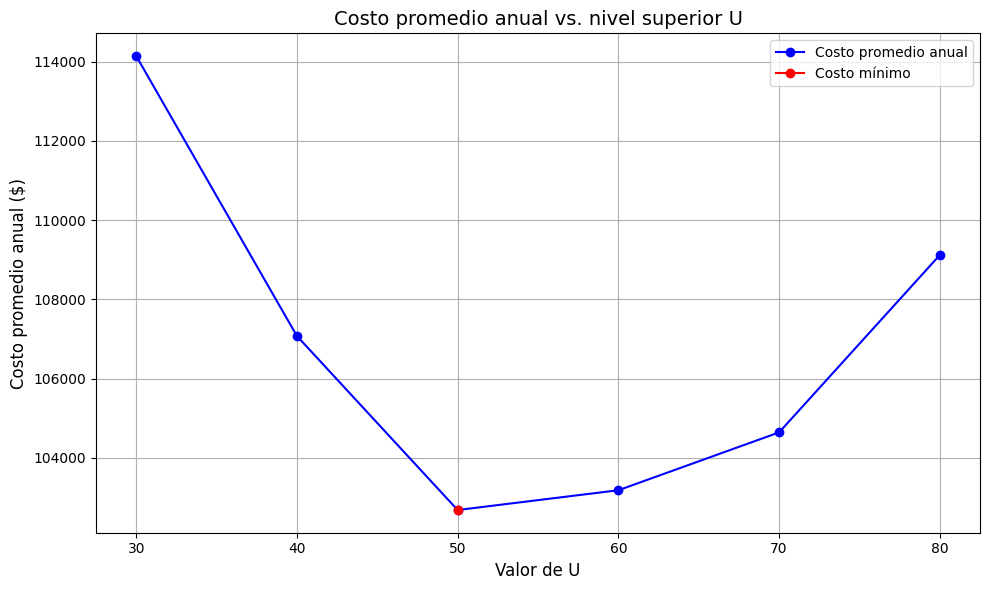

In [93]:
# Importamos módulos estándar para simulación y estadística
import random
import math
import statistics
import matplotlib.pyplot as plt


def sample_normal_box_muller(mu, sigma):
    """
    Genera una muestra aleatoria de una distribución normal utilizando
    el método de Box-Muller.

    Args:
        mu (float): Media de la distribución.
        sigma (float): Desviación estándar.

    Returns:
        float: Muestra aleatoria de la distribución N(mu, sigma^2)
    """
    u1 = random.random()
    u2 = random.random()
    r = math.sqrt(-2.0 * math.log(u1))
    theta = 2.0 * math.pi * u2
    z1 = r * math.cos(theta)
    x1 = mu + sigma * z1
    return round(x1)


def simular_politica(U, iteraciones=500):
    """
    Simula la política de producción para un valor dado de U durante
    un número de iteraciones.

    Args:
        U (int): Límite superior de inventario para decidir producción.
        iteraciones (int): Número de simulaciones anuales.

    Returns:
        list: Lista de costos anuales acumulados por simulación.
    """
    L = 30
    media = 120
    sigma = 15
    costos = []

    for _ in range(iteraciones):
        inventario = 60
        produccion = 120
        costo_total = 0

        for _ in range(52):
            demanda = sample_normal_box_muller(media, sigma)

            # Calculamos ventas y actualizamos inventario
            if demanda > inventario + produccion:
                ventas = inventario + produccion
                inventario = 0
            else:
                ventas = demanda
                inventario = inventario + produccion - ventas

            # Determinamos nueva producción y costo por cambio
            nueva_produccion = produccion
            if inventario < L:
                nueva_produccion = 130
            elif inventario > U:
                nueva_produccion = 110

            if nueva_produccion != produccion:
                costo_total += 3000

            produccion = nueva_produccion

            # Agregamos costos por inventario y penalización por ventas perdidas
            costo_total += inventario * 30

        costos.append(costo_total)

    return costos


def calcular_metricas(costos_por_U, margen_error=100, z=1.96):
    """
    Calcula estadísticas por valor de U: media, desviación,
    tamaño muestral necesario, e intervalo de confianza para el mejor U.

    Args:
        costos_por_U (dict): Diccionario con listas de costos por U.
        margen_error (float): Precisión deseada para la estimación.
        z (float): Valor crítico para nivel de confianza (default 95%).

    Returns:
        None
    """
    print("\n--- Estadísticas por U ---\n")

    medias = {}
    for u, costos in costos_por_U.items():
        media = statistics.mean(costos)
        desviacion = statistics.stdev(costos)
        n_requerido = (z * desviacion / margen_error) ** 2

        medias[u] = media

        print(f"U = {u}:")
        print(f"  Media = {media:.2f}")
        print(f"  Desviación estándar = {desviacion:.2f}")
        print(f"  Iteraciones necesarias (±{margen_error}) = {math.ceil(n_requerido)}\n")

    # Determinamos el mejor U
    mejor_u = min(medias, key=medias.get)
    costos_mejor = costos_por_U[mejor_u]
    media = medias[mejor_u]
    desviacion = statistics.stdev(costos_mejor)
    n = len(costos_mejor)
    margen = z * desviacion / math.sqrt(n)

    print(f"Mejor valor de U = {mejor_u}")
    print(f"Intervalo de confianza 95%: ({media - margen:.2f}, {media + margen:.2f})\n")



def graficar_costos(U_values, medias):
    """
    Grafica el costo medio anual para cada valor de U.

    Args:
        U_values (list): Lista de valores de U.
        medias (dict): Diccionario con medias por U.

    Returns:
        None
    """
    costos = [medias[u] for u in U_values]

    plt.figure(figsize=(10, 6))
    plt.plot(U_values, costos, marker='o', linestyle='-',
             color='blue', label='Costo promedio anual')

    min_index = costos.index(min(costos))
    plt.plot(U_values[min_index], costos[min_index],
             marker='o', color='red', label='Costo mínimo')

    plt.title('Costo promedio anual vs. nivel superior U', fontsize=14)
    plt.xlabel('Valor de U', fontsize=12)
    plt.ylabel('Costo promedio anual ($)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# --------- EJECUCIÓN DEL MODELO ---------

# Valores de U a evaluar
U_values = [30, 40, 50, 60, 70, 80]

# Ejecutamos simulación para cada U
costos_por_U = {}
for u in U_values:
    costos_por_U[u] = simular_politica(u)

# Calculamos y reportamos estadísticas
calcular_metricas(costos_por_U)

# Obtenemos medias para graficar
medias_dict = {u: statistics.mean(costos) for u, costos in costos_por_U.items()}

# Graficamos resultados
graficar_costos(U_values, medias_dict)
